In [52]:
#!pip install -U -q PyDrive
#!pip install pycaret-ts-alpha
import os
#from pydrive.auth import GoogleAuth
import numpy as np

#from pydrive.drive import GoogleDrive
import matplotlib.pyplot as plt
#from google.colab import drive
#from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [171]:
df_2 =pd.read_excel('PROJECAO_RODANTES_2.xlsx')

df_2 = df_2.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'FROTA', 'LE'])
df_2['DATA'] = pd.to_datetime(df_2['DATA'])
df_2.set_index('DATA', drop=True, inplace=True)
df_2

,LD
DATA,
2021-09-04,10.5
2021-09-16,10.1
2021-11-01,8.3
2022-02-11,7.3
2022-04-22,7.3
...,...
2022-10-13,NaN
2022-10-28,NaN
2022-11-12,NaN


In [53]:
df=pd.read_excel('PROJECAO_RODANTES.xlsx')
df

,DATA,FROTA,LD,LE
0,2021-09-04,49578,10.5,10.5
1,2021-09-16,49578,10.1,10.2
2,2021-11-01,49578,8.3,8.0
3,2022-02-11,49578,7.3,7.1
4,2022-04-22,49578,7.3,7.1
...,...,...,...,...
56,2021-09-09,340054,9.0,8.3
57,2021-11-01,340054,3.9,3.9
58,2022-04-01,340054,3.9,3.9
59,2022-05-11,340054,10.9,11.0


In [54]:
df['DATA'] = pd.to_datetime(df['DATA'])
df.set_index('DATA',drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2021-09-04 to 2022-05-16
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FROTA   61 non-null     int64  
 1   LD      61 non-null     float64
 2   LE      61 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2021-09-04 to 2022-05-16
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FROTA   61 non-null     int64  
 1   LD      61 non-null     float64
 2   LE      61 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [56]:
a=df[df.FROTA==49578][['LD','LE']]
b=df[df.FROTA==112211][['LD','LE']]
c=df[df.FROTA==112212][['LD','LE']]
d=df[df.FROTA==112228][['LD','LE']]
e=df[df.FROTA==112409][['LD','LE']]
f=df[df.FROTA==112410][['LD','LE']]
g=df[df.FROTA==117576][['LD','LE']]
h=df[df.FROTA==117579][['LD','LE']]
j=df[df.FROTA==340031][['LD','LE']]
k=df[df.FROTA==340031][['LD','LE']]
l=df[df.FROTA==340032][['LD','LE']]
m=df[df.FROTA==340054][['LD','LE']]
n=df[df.FROTA==340065][['LD','LE']]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x = a.drop('LD', axis = 1)
x1 = a.drop('LE', axis = 1)

In [59]:
y=a['LD']
y1=a['LE']

In [60]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.3, random_state = 1)
x1_train, x1_test, y1_train, y1_test = train_test_split (x,y,test_size = 0.3, random_state = 1)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

In [62]:
lin_reg = LinearRegression()
lin_reg.fit (x_train, y_train)
lin_reg.fit (x1_train, y1_train)

LinearRegression()

In [173]:
x_train

,LE
DATA,
2022-04-22,7.1
2021-09-04,10.5
2022-02-11,7.1


In [174]:
y_train

DATA
2022-04-22     7.3
2021-09-04    10.5
2022-02-11     7.3
Name: LD, dtype: float64

In [172]:
lin_reg.predict(df_2)

c:\Users\arthu\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- LD
Feature names seen at fit time, yet now missing:
- LE

  warnings.warn(message, FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [63]:
test_pred_lin = lin_reg.predict(x_test)
test_pred_lin1 = lin_reg.predict(x1_test)

r2_lin = metrics.r2_score (y_test, test_pred_lin)
r2_lin1 = metrics.r2_score (y1_test, test_pred_lin1)

rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
rmse_lin1 = np.sqrt(metrics.mean_squared_error(y1_test, test_pred_lin1))

print(f"R² da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rmse_lin}")

print(f"R² da Regressão Linear: {r2_lin1}")
print(f"RSME da Regressão Linear: {rmse_lin1}")

R² da Regressão Linear: 0.9770173864752874
RSME da Regressão Linear: 0.13644015887933153
R² da Regressão Linear: 0.9770173864752874
RSME da Regressão Linear: 0.13644015887933153


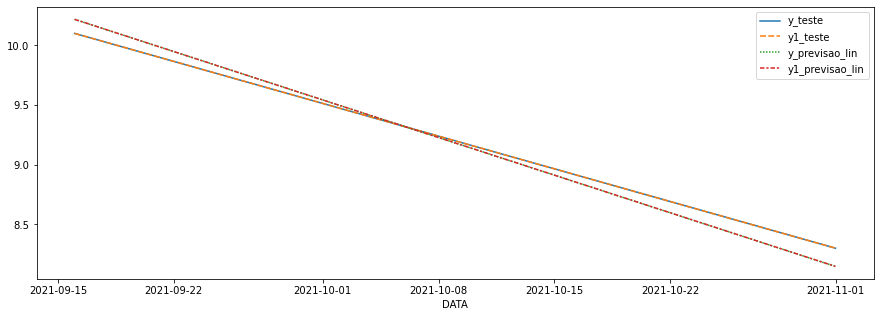

,y_teste,y1_teste,y_previsao_lin,y1_previsao_lin
DATA,,,,
2021-11-01,8.3,8.3,8.147059,8.147059
2021-09-16,10.1,10.1,10.217647,10.217647


In [64]:
df_resultado = pd.DataFrame()
df_resultado['y_teste'] = y_test
df_resultado['y1_teste'] = y1_test

df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado['y1_previsao_lin'] = test_pred_lin1

fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()

In [134]:
df_resultado

,y_teste,y1_teste,y_previsao_lin,y1_previsao_lin
DATA,,,,
2021-11-01,8.3,8.3,8.147059,8.147059
2021-09-16,10.1,10.1,10.217647,10.217647


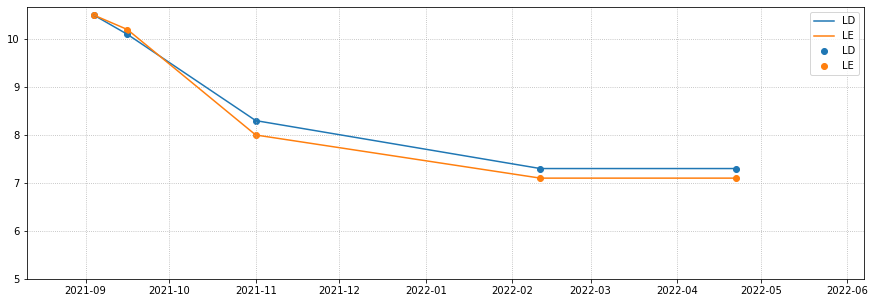

In [133]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(a.index, a.LD, label='LD')
ax.plot(a.index, a.LE, label='LE')

ax.scatter(a.index, a.LD, label='LD')
ax.scatter(a.index, a.LE, label='LE')

ax.set_ylim(5)
ax.set_xlim(18850, 19150)
ax.grid(ls='dotted')
ax.legend()

In [143]:
for i in range(5000):
    [a.index==5].values

array([], shape=(0, 2), dtype=float64)

In [ ]:
# criando uma serie somente para avaliar o lado direito 
df_LD=df[['LD']]
df_LD

,LD
DATA,
2021-09-04,10.5
2021-09-16,10.1
2021-11-01,8.3
2022-02-11,7.3
2022-04-22,7.3
...,...
2021-09-09,9.0
2021-11-01,3.9
2022-04-01,3.9


Avaliar modelo, usando o comenado *series.shift()*. Criaremos uma nova coluna naive como sendo o deslocamento de um período 

In [ ]:
df_LD['previsao_LD']= df_LD.LD.shift(1)
#df['previsao_LE']= df.LE.shift()
#df.dropna(axis=0,inplace=True)
df_LD

C:\Users\arthu\AppData\Local\Temp/ipykernel_20708/3878060449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LD['previsao_LD']= df_LD.LD.shift(1)


,LD,previsao_LD
DATA,,
2021-09-04,10.5,NaN
2021-09-16,10.1,10.5
2021-11-01,8.3,10.1
2022-02-11,7.3,8.3
2022-04-22,7.3,7.3
...,...,...
2021-09-09,9.0,9.0
2021-11-01,3.9,9.0
2022-04-01,3.9,3.9


<AxesSubplot:xlabel='DATA'>

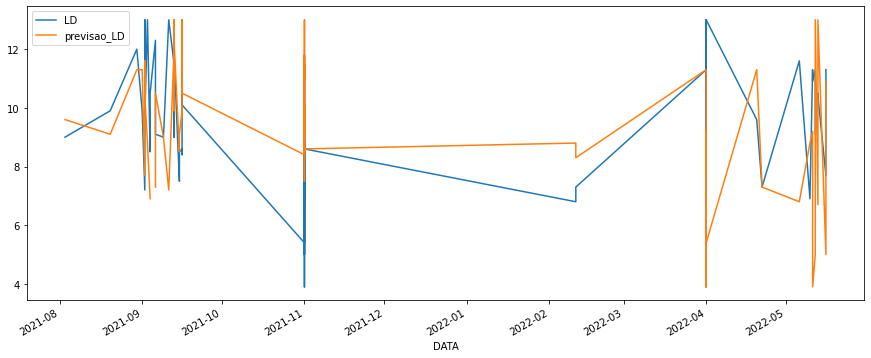

In [ ]:
df_LD.plot(figsize=(15,6))

**ERRO MÉDIO QUADRÁTICO PARA O MODELO NAIVE**

FAREMOS A VALIDAÇÃO DO MODELO NAIVE CALCULADO O ERRO MÉDIO QUADRÁTICO ENTRE AS PREVISÕES E OS VALORES OBSERVADOS. PARA TANTO, FAREMOS O CÁLCULO DA DIFERENÇA QUADRÁTICA ENTRE A COLUNA LD E A COLUNA PREVISAO_LD. PARA CALCULAR A MÉDIA DO ERRO, UTILIZAMOS O COMANDO *SERIES.MEAN().*

In [ ]:
((df_LD.previsao_LD - df_LD.LD)**2).mean()

8.104666666666667

**2- MODELO AUTOREGRESSIVO (AR)**

In [ ]:
df['x1']= df.LD.shift(1)
df['x2']= df.LE.shift(1)

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
LD = df[["LD","x1"]]
LE = df[["LE","x2"]]
display(LD,LE)

,LD,x1
DATA,,
2021-09-16,10.1,10.5
2021-11-01,8.3,10.1
2022-02-11,7.3,8.3
2022-04-22,7.3,7.3
2021-09-06,12.3,7.3
2021-09-13,11.8,12.3
2021-11-01,9.2,11.8
2022-04-01,9.2,9.2
2022-05-11,11.3,9.2


,LE,x2
DATA,,
2021-09-16,10.2,10.5
2021-11-01,8.0,10.2
2022-02-11,7.1,8.0
2022-04-22,7.1,7.1
2021-09-06,12.1,7.1
2021-09-13,11.8,12.1
2021-11-01,9.3,11.8
2022-04-01,9.3,9.3
2022-05-11,11.4,9.3


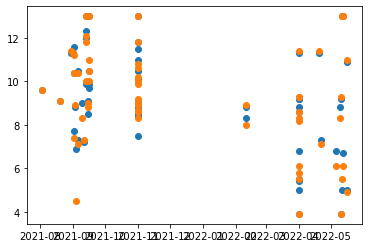

In [ ]:
plt.scatter(LD.index,LD.x1)
plt.scatter(LE.index,LE.x2)

In [ ]:
#Tratando como regressão linear 
from sklearn.linear_model import LinearRegression

In [ ]:
X = LD.x1.values
y = LD.LD.values
display(X,y)
y

array([10.5, 10.1,  8.3,  7.3,  7.3, 12.3, 11.8,  9.2,  9.2, 11.3, 12. ,
       11.5,  9.2, 13. , 10.4,  9.7,  8.4,  5.4, 13. ,  9.1,  9.9,  8.6,
        8.6,  6.7, 10.5,  9.1,  8.5,  5.5,  5. ,  7.7,  7.2, 13. ,  8.8,
        6.8, 11.6, 13. , 10.5,  5. ,  5. , 11.3,  9.9,  9. ,  6.8,  8.8,
        8.8, 13. , 11. ,  8.8,  8.8,  6.9,  8.5,  7.5, 11.3, 11.3,  9.6,
        9. ,  9. ,  3.9,  3.9, 10.9])

array([10.1,  8.3,  7.3,  7.3, 12.3, 11.8,  9.2,  9.2, 11.3, 12. , 11.5,
        9.2, 13. , 10.4,  9.7,  8.4,  5.4, 13. ,  9.1,  9.9,  8.6,  8.6,
        6.7, 10.5,  9.1,  8.5,  5.5,  5. ,  7.7,  7.2, 13. ,  8.8,  6.8,
       11.6, 13. , 10.5,  5. ,  5. , 11.3,  9.9,  9. ,  6.8,  8.8,  8.8,
       13. , 11. ,  8.8,  8.8,  6.9,  8.5,  7.5, 11.3, 11.3,  9.6,  9. ,
        9. ,  3.9,  3.9, 10.9, 11.3])

array([10.1,  8.3,  7.3,  7.3, 12.3, 11.8,  9.2,  9.2, 11.3, 12. , 11.5,
        9.2, 13. , 10.4,  9.7,  8.4,  5.4, 13. ,  9.1,  9.9,  8.6,  8.6,
        6.7, 10.5,  9.1,  8.5,  5.5,  5. ,  7.7,  7.2, 13. ,  8.8,  6.8,
       11.6, 13. , 10.5,  5. ,  5. , 11.3,  9.9,  9. ,  6.8,  8.8,  8.8,
       13. , 11. ,  8.8,  8.8,  6.9,  8.5,  7.5, 11.3, 11.3,  9.6,  9. ,
        9. ,  3.9,  3.9, 10.9, 11.3])

In [ ]:
#reg = LinearRegression().fit(X.reshape(-1,1),y)
#previsoes= reg.predict(X.reshape(-1,1),y)

In [ ]:
reg = LinearRegression().fit(X.reshape(-1,1),y)
previsoes = reg.predict(X.reshape(-1,1))
previsoes

array([ 9.48229079,  9.38405934,  8.94201781,  8.69643918,  8.69643918,
        9.92433232,  9.80154301,  9.16303858,  9.16303858,  9.67875369,
        9.85065873,  9.72786942,  9.16303858, 10.09623736,  9.45773293,
        9.28582789,  8.96657567,  8.22983979, 10.09623736,  9.13848071,
        9.33494361,  9.0156914 ,  9.0156914 ,  8.54909201,  9.48229079,
        9.13848071,  8.99113354,  8.25439765,  8.13160834,  8.79467063,
        8.67188132, 10.09623736,  9.06480712,  8.57364987,  9.75242728,
       10.09623736,  9.48229079,  8.13160834,  8.13160834,  9.67875369,
        9.33494361,  9.11392285,  8.57364987,  9.06480712,  9.06480712,
       10.09623736,  9.6050801 ,  9.06480712,  9.06480712,  8.59820773,
        8.99113354,  8.74555491,  9.67875369,  9.67875369,  9.26127003,
        9.11392285,  9.11392285,  7.86147185,  7.86147185,  9.58052224])

In [ ]:
a=((y- previsoes)**2).mean()
a

5.065092828707364

In [ ]:
np.sort(y,-1)

array([ 3.9,  3.9,  5. ,  5. ,  5. ,  5.4,  5.5,  6.7,  6.8,  6.8,  6.9,
        7.2,  7.3,  7.3,  7.5,  7.7,  8.3,  8.4,  8.5,  8.5,  8.6,  8.6,
        8.8,  8.8,  8.8,  8.8,  8.8,  9. ,  9. ,  9. ,  9.1,  9.1,  9.2,
        9.2,  9.2,  9.6,  9.7,  9.9,  9.9, 10.1, 10.4, 10.5, 10.5, 10.9,
       11. , 11.3, 11.3, 11.3, 11.3, 11.3, 11.5, 11.6, 11.8, 12. , 12.3,
       13. , 13. , 13. , 13. , 13. ])

RODANDO O MODELO DE REGRESSÃO PARA AR(1) OBTEMOS $R^2=0.32$, VALOR INFERIOR AO COM MODELO NAIVE. ABAIXO A REPRESENTAÇÃO VISUAL DO MODELO DE REGRESSÃO LINEAR.

In [ ]:
y 

array([10.1,  8.3,  7.3,  7.3, 12.3, 11.8,  9.2,  9.2, 11.3, 12. , 11.5,
        9.2, 13. , 10.4,  9.7,  8.4,  5.4, 13. ,  9.1,  9.9,  8.6,  8.6,
        6.7, 10.5,  9.1,  8.5,  5.5,  5. ,  7.7,  7.2, 13. ,  8.8,  6.8,
       11.6, 13. , 10.5,  5. ,  5. , 11.3,  9.9,  9. ,  6.8,  8.8,  8.8,
       13. , 11. ,  8.8,  8.8,  6.9,  8.5,  7.5, 11.3, 11.3,  9.6,  9. ,
        9. ,  3.9,  3.9, 10.9, 11.3])

Text(0, 0.5, 'LD')

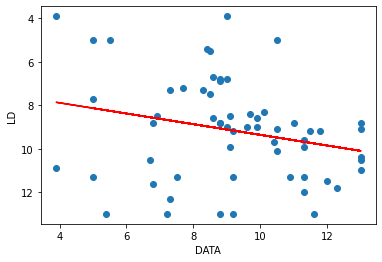

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X.reshape(-1,1)), color = 'red')
plt.gca().invert_yaxis()
plt.xlabel('DATA')
plt.ylabel('LD')

In [ ]:
previsoes

array([ 9.48229079,  9.38405934,  8.94201781,  8.69643918,  8.69643918,
        9.92433232,  9.80154301,  9.16303858,  9.16303858,  9.67875369,
        9.85065873,  9.72786942,  9.16303858, 10.09623736,  9.45773293,
        9.28582789,  8.96657567,  8.22983979, 10.09623736,  9.13848071,
        9.33494361,  9.0156914 ,  9.0156914 ,  8.54909201,  9.48229079,
        9.13848071,  8.99113354,  8.25439765,  8.13160834,  8.79467063,
        8.67188132, 10.09623736,  9.06480712,  8.57364987,  9.75242728,
       10.09623736,  9.48229079,  8.13160834,  8.13160834,  9.67875369,
        9.33494361,  9.11392285,  8.57364987,  9.06480712,  9.06480712,
       10.09623736,  9.6050801 ,  9.06480712,  9.06480712,  8.59820773,
        8.99113354,  8.74555491,  9.67875369,  9.67875369,  9.26127003,
        9.11392285,  9.11392285,  7.86147185,  7.86147185,  9.58052224])

C:\Users\arthu\AppData\Local\Temp/ipykernel_20708/2090123269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LD['ar_1'] = previsoes


<AxesSubplot:xlabel='DATA'>

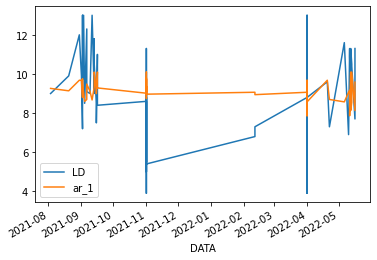

In [ ]:
LD['ar_1'] = previsoes
LD.head()
LD[["LD","ar_1"]].plot()

utilizando o pacote statsmodels

In [ ]:
from statsmodels.tsa.ar_model import AR
ar_2= AR(LD.index, freq='MS').fit(1)

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

In [ ]:
ar_2.resid

NameError: ignored